# Import Dependencies

In [1]:
# import global dependencies
import pandas as pd
import os
import glob
import numpy as np
# import src dependencies
os.chdir("../..")
from  src.forecasting.LSTM_Autoencoders import *
# Volvemos a test
os.chdir("test/Forescasting_LSTM_Autoencoders")

2022-02-01 23:18:59.136701: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-01 23:18:59.136726: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
variable='coolant'
data=pd.read_csv("data.csv")

In [3]:
data

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


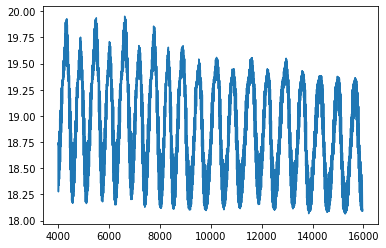

In [4]:
from matplotlib import pyplot
variable='coolant'
data_r=data[data.profile_id==17]
data_r=data_r.iloc[4000:,:]
data_red=data_r.loc[:,variable]
data_red.plot()
data_final=data_red.reset_index(drop=True)
pyplot.show()

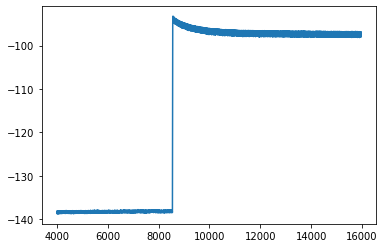

In [5]:
variable='i_d'
data_r=data[data.profile_id==17]
data_r=data_r.iloc[4000:,:]
data_agg=data_r.loc[:,variable]
data_agg.plot()
data_agg=data_agg.reset_index(drop=True)
pyplot.show()

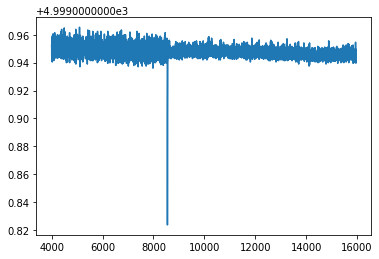

In [6]:
variable='motor_speed'
data_r=data[data.profile_id==17]
data_r=data_r.iloc[4000:,:]
data_agg_2=data_r.loc[:,variable]
data_agg_2.plot()
data_agg_2=data_agg_2.reset_index(drop=True)
pyplot.show()

# Scaler

In [7]:
direccion='models/'
X_coolant=Scaler(df=data_final,direction=direccion,name='coolant')
name='coolant'
with open('models/model_scaler'+name+'.pkl', 'rb') as f:
    scaler_coolant = pickle.load(f)
# X_test_scaler=scaler.transform(data_test)

In [8]:
direccion='models/'
X_id=Scaler(df=data_agg,direction=direccion,name='i_d')
name='i_d'
with open('models/model_scaler'+name+'.pkl', 'rb') as f:
    scaler_id = pickle.load(f)
# X_test_scaler=scaler.transform(data_test)

In [9]:
direccion='models/'
X_m=Scaler(df=data_agg,direction=direccion,name='motor_speed')
name='motor_speed'
with open('models/model_scaler'+name+'.pkl', 'rb') as f:
    scaler_m = pickle.load(f)
# X_test_scaler=scaler.transform(data_test)

In [11]:
X_col,y=create_sequences(X_coolant,time_steps=10,time_steps_y=1)
X_agr,y_agr=create_sequences(X_id,time_steps=10,time_steps_y=1)
#X_agr2,y_agr2=create_sequences(X_m,time_steps=10,time_steps_y=1)
X_col=np.concatenate((X_col,X_agr),axis=2)
#X_col=np.concatenate((X_col,X_agr2),axis=2)

# Create Models

In [12]:
d1=128
d2=64
d3=32
dpt=0.2
model=model_lstm_autoencoders(X=X_col,y=y,dim1=d1,dim2=d2,dim3=d3,dp=dpt)

2022-02-01 23:19:45.702695: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-01 23:19:45.702721: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-01 23:19:45.702743: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rgil-ThinkPad-E580): /proc/driver/nvidia/version does not exist
2022-02-01 23:19:45.703050: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 10, 2)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 10, 128)      67072       input[0][0]                      
__________________________________________________________________________________________________
dropout (Dropout)               (None, 10, 128)      0           lstm[0][0]                       
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 64)           49408       dropout[0][0]                    
______________________________________________________________________________________________

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=314)

In [15]:
direccion='models/'
patience=20
bs=50
n_epochs=10000
verbose=1
training(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,model=model,patience=patience,direccion=direccion,bs=bs,n_epochs=n_epochs,verbose=verbose)

2022-02-01 23:19:50.127672: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10000
192/192 [==============================] - 9s 27ms/step - loss: 0.4594 - time_distributed_loss: 0.2466 - reg_loss: 0.2128 - time_distributed_mean_squared_error: 0.2466 - reg_mean_squared_error: 0.2128 - val_loss: 0.1043 - val_time_distributed_loss: 0.0423 - val_reg_loss: 0.0620 - val_time_distributed_mean_squared_error: 0.0423 - val_reg_mean_squared_error: 0.0620

Epoch 00001: val_reg_loss improved from inf to 0.06205, saving model to models/model_lstm_autoencoder.h5
Epoch 2/10000
192/192 [==============================] - 5s 27ms/step - loss: 0.1357 - time_distributed_loss: 0.0537 - reg_loss: 0.0820 - time_distributed_mean_squared_error: 0.0537 - reg_mean_squared_error: 0.0820 - val_loss: 0.0429 - val_time_distributed_loss: 0.0184 - val_reg_loss: 0.0245 - val_time_distributed_mean_squared_error: 0.0184 - val_reg_mean_squared_error: 0.0245

Epoch 00002: val_reg_loss improved from 0.06205 to 0.02448, saving model to models/model_lstm_autoencoder.h5
Epoch 3/10000
192/192 [=

192/192 [==============================] - 6s 30ms/step - loss: 0.0436 - time_distributed_loss: 0.0164 - reg_loss: 0.0272 - time_distributed_mean_squared_error: 0.0164 - reg_mean_squared_error: 0.0272 - val_loss: 0.0065 - val_time_distributed_loss: 0.0027 - val_reg_loss: 0.0038 - val_time_distributed_mean_squared_error: 0.0027 - val_reg_mean_squared_error: 0.0038

Epoch 00018: val_reg_loss did not improve from 0.00325
Epoch 19/10000
192/192 [==============================] - 6s 30ms/step - loss: 0.0436 - time_distributed_loss: 0.0163 - reg_loss: 0.0273 - time_distributed_mean_squared_error: 0.0163 - reg_mean_squared_error: 0.0273 - val_loss: 0.0070 - val_time_distributed_loss: 0.0027 - val_reg_loss: 0.0043 - val_time_distributed_mean_squared_error: 0.0027 - val_reg_mean_squared_error: 0.0043

Epoch 00019: val_reg_loss did not improve from 0.00325
Epoch 20/10000
192/192 [==============================] - 6s 30ms/step - loss: 0.0409 - time_distributed_loss: 0.0152 - reg_loss: 0.0257 - ti

192/192 [==============================] - 6s 30ms/step - loss: 0.0427 - time_distributed_loss: 0.0165 - reg_loss: 0.0261 - time_distributed_mean_squared_error: 0.0165 - reg_mean_squared_error: 0.0261 - val_loss: 0.0075 - val_time_distributed_loss: 0.0026 - val_reg_loss: 0.0049 - val_time_distributed_mean_squared_error: 0.0026 - val_reg_mean_squared_error: 0.0049

Epoch 00036: val_reg_loss did not improve from 0.00225
Epoch 37/10000
192/192 [==============================] - 6s 30ms/step - loss: 0.0390 - time_distributed_loss: 0.0144 - reg_loss: 0.0246 - time_distributed_mean_squared_error: 0.0144 - reg_mean_squared_error: 0.0246 - val_loss: 0.0067 - val_time_distributed_loss: 0.0024 - val_reg_loss: 0.0043 - val_time_distributed_mean_squared_error: 0.0024 - val_reg_mean_squared_error: 0.0043

Epoch 00037: val_reg_loss did not improve from 0.00225
Epoch 38/10000
192/192 [==============================] - 6s 30ms/step - loss: 0.0374 - time_distributed_loss: 0.0133 - reg_loss: 0.0241 - ti


Epoch 00054: val_reg_loss improved from 0.00215 to 0.00191, saving model to models/model_lstm_autoencoder.h5
Epoch 55/10000
192/192 [==============================] - 5s 29ms/step - loss: 0.0355 - time_distributed_loss: 0.0131 - reg_loss: 0.0224 - time_distributed_mean_squared_error: 0.0131 - reg_mean_squared_error: 0.0224 - val_loss: 0.0070 - val_time_distributed_loss: 0.0036 - val_reg_loss: 0.0034 - val_time_distributed_mean_squared_error: 0.0036 - val_reg_mean_squared_error: 0.0034

Epoch 00055: val_reg_loss did not improve from 0.00191
Epoch 56/10000
192/192 [==============================] - 6s 29ms/step - loss: 0.0355 - time_distributed_loss: 0.0125 - reg_loss: 0.0230 - time_distributed_mean_squared_error: 0.0125 - reg_mean_squared_error: 0.0230 - val_loss: 0.0086 - val_time_distributed_loss: 0.0066 - val_reg_loss: 0.0020 - val_time_distributed_mean_squared_error: 0.0066 - val_reg_mean_squared_error: 0.0020

Epoch 00056: val_reg_loss did not improve from 0.00191
Epoch 57/10000
1

192/192 [==============================] - 6s 29ms/step - loss: 0.0318 - time_distributed_loss: 0.0113 - reg_loss: 0.0205 - time_distributed_mean_squared_error: 0.0113 - reg_mean_squared_error: 0.0205 - val_loss: 0.0054 - val_time_distributed_loss: 0.0019 - val_reg_loss: 0.0035 - val_time_distributed_mean_squared_error: 0.0019 - val_reg_mean_squared_error: 0.0035

Epoch 00073: val_reg_loss did not improve from 0.00160
Epoch 74/10000
192/192 [==============================] - 5s 25ms/step - loss: 0.0328 - time_distributed_loss: 0.0113 - reg_loss: 0.0216 - time_distributed_mean_squared_error: 0.0113 - reg_mean_squared_error: 0.0216 - val_loss: 0.0040 - val_time_distributed_loss: 0.0020 - val_reg_loss: 0.0020 - val_time_distributed_mean_squared_error: 0.0020 - val_reg_mean_squared_error: 0.0020

Epoch 00074: val_reg_loss did not improve from 0.00160
Epoch 75/10000
192/192 [==============================] - 6s 30ms/step - loss: 0.0324 - time_distributed_loss: 0.0112 - reg_loss: 0.0213 - ti

In [ ]:
new_model = tf.keras.models.load_model('models/model_lstm_autoencoder.h5')

In [ ]:
new_model.predict(X_col)[1]

In [ ]:
X_col

In [ ]:
graphs(X=X_col,y=y,scaler=scaler_coolant,lin_inf=100,lim_sup=120,model=new_model)

In [ ]:

import matplotlib.pyplot as plt
plt.plot(pd.DataFrame(scaler_coolant.inverse_transform(new_model.predict(X_col[80].reshape(1,100,1))).reshape(10,1)), label = "Predict")
# plotting the line 2 points 
plt.plot(pd.DataFrame(scaler_coolant.inverse_transform(y[80].reshape(10,1))), label = "Real")
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
scaler_coolant.inverse_transform(new_model.predict(X_col[0].reshape(1,100,1))).reshape(10,1)